### a notebook to showcase my network module

In [1]:
%load_ext autoreload
%autoreload 2

import network

import gc
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
### MNIST classification
# please place the dataset manually into data/ folder

# load
train = pd.read_csv("data/mnist_train.csv", header=None)
test = pd.read_csv("data/mnist_test.csv", header=None)

# preprocess X
X   = train.iloc[:, 1:].to_numpy(np.float32) / 255.0 * 0.99 + 0.01
X_t = test.iloc[:, 1:].to_numpy(np.float32) / 255.0 * 0.99 + 0.01

# one hot encode y
y   = np.eye(10)[train.iloc[:,0].to_numpy((int))]
y_t = np.eye(10)[test.iloc[:,0].to_numpy((int))]
y_true = np.argmax(y_t, axis=1)

del test, train

In [8]:
# define network
# please have a look on network/network.py to see how it works
nn = network.NeuralNetwork([
                    network.Linear_layer(784, 200),
                    network.Activation_layer('ReLU'),
    
                    network.Linear_layer(200, 10),
                    network.Activation_layer('fast_softmax')
                    ])

# define hyperparameteers
# hopefully the names are self-explantory
param = {"lr": 1e-3, 'batch': 16, "mode": "train", "eps": 1e-16, "epoch": 0, 't': 1, 'clip': 1.0,
         'optimizer': ('Adam', 0.9, 0.999), 'regularizer': ('l2', 1e-3), "loss_fn":"fast_cross_entropy"}

In [9]:
for i in range(5):

    nn.train(X, y, param)
    yhat = nn.query(X_t)
    accuracy = accuracy_score(y_true, yhat) * 100
    print(f"Epoch {i}, Performance = {accuracy}")
    param['lr'] *= 0.9
    
gc.collect()

Average loss = 3.394264, elapsed time = 55.24.
Epoch 0, Performance = 96.76
Average loss = 1.396231, elapsed time = 50.62.
Epoch 1, Performance = 97.39
Average loss = 0.908075, elapsed time = 50.09.
Epoch 2, Performance = 97.56
Average loss = 0.637963, elapsed time = 50.65.
Epoch 3, Performance = 98.05
Average loss = 0.439399, elapsed time = 50.42.
Epoch 4, Performance = 98.1


88

In [10]:
nn.print_parameters()

--0--
Printing linear layer:
{'bias': 0,
 'freeze': False,
 'input': array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 1.  ],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 1.  ],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 1.  ],
       ...,
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 1.  ],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 1.  ],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 1.  ]]),
 'input_nodes': 784,
 'm1': array([[ 3.72167929e-06, -1.50918649e-07, -7.27668734e-06, ...,
        -2.74290893e-07,  7.40447079e-06,  2.44967007e-06],
       [ 3.72167929e-06, -1.50918649e-07, -7.27668734e-06, ...,
        -2.74290893e-07,  7.40447079e-06,  2.44967007e-06],
       [ 3.72167929e-06, -1.50918649e-07, -7.27668734e-06, ...,
        -2.74290893e-07,  7.40447079e-06,  2.44967007e-06],
       ...,
       [ 3.72167929e-06, -1.50918649e-07, -7.27668734e-06, ...,
        -2.74290893e-07,  7.40447079e-06,  2.44967007e-06],
       [ 3.72167929e-06, -1.50918649e-07, -7.27668734e-06, ...,
        -2.742908

In [2]:
### Regression

x1 = np.arange(1,100)
x2 = np.arange(1,100)+1
x3 = np.stack((x1,x2)).T

x4 = x1*x2/99+x1
x4 = np.expand_dims(x4,axis=1)

In [3]:
# Maxout layer is a good choice for regression tasks thanks to its high complexity
nn2 = network.NeuralNetwork([
                    network.Maxout_layer(2, 20),
                    network.Maxout_layer(20, 1)
                    ])

param = {"lr": 1e-3, 'batch': 16, "mode": "train", "eps": 1e-16, "epoch": 0, 't': 1, 'clip': 1.0,
         'optimizer': ('Adam', 0.9, 0.999), 'regularizer': None, "loss_fn":"mse"}

In [4]:
temp = nn2.layers[0].w1

In [5]:
for _ in range(1000):
    nn2.train(x3, x4, param)

Average loss = 5715.069691, elapsed time = 0.00.
Average loss = 3984.183951, elapsed time = 0.00.
Average loss = 2639.355137, elapsed time = 0.00.
Average loss = 1494.810502, elapsed time = 0.00.
Average loss = 736.108666, elapsed time = 0.00.
Average loss = 286.993389, elapsed time = 0.00.
Average loss = 138.467488, elapsed time = 0.00.
Average loss = 151.265311, elapsed time = 0.00.
Average loss = 164.228200, elapsed time = 0.00.
Average loss = 140.343777, elapsed time = 0.00.
Average loss = 125.948691, elapsed time = 0.00.
Average loss = 127.698594, elapsed time = 0.00.
Average loss = 127.502681, elapsed time = 0.00.
Average loss = 130.309883, elapsed time = 0.00.
Average loss = 126.031136, elapsed time = 0.00.
Average loss = 125.906236, elapsed time = 0.00.
Average loss = 124.697353, elapsed time = 0.00.
Average loss = 125.570006, elapsed time = 0.00.
Average loss = 124.786137, elapsed time = 0.00.
Average loss = 125.256976, elapsed time = 0.00.
Average loss = 124.526780, elapsed t

In [6]:
print(f"{param['epoch']} epoch trained, error:")

# errors
nn2(x3) - x4

1000 epoch trained, error:


array([[-1.70767785e-01],
       [-7.89290270e-02],
       [-7.29228892e-03],
       [ 4.41424289e-02],
       [ 7.53751266e-02],
       [ 8.64058040e-02],
       [ 7.72344613e-02],
       [ 6.37285087e-02],
       [ 9.14267272e-02],
       [ 1.39587924e-01],
       [ 1.67547100e-01],
       [ 1.75304256e-01],
       [ 1.62859391e-01],
       [ 1.30212507e-01],
       [ 7.73636024e-02],
       [ 4.31267759e-03],
       [ 6.06801915e-02],
       [ 1.21437834e-01],
       [ 1.61993456e-01],
       [ 1.82347058e-01],
       [ 1.82498640e-01],
       [ 1.62448201e-01],
       [ 1.22195742e-01],
       [ 1.22184755e-01],
       [ 2.27301402e-01],
       [ 3.12216029e-01],
       [ 3.76928636e-01],
       [ 4.21439223e-01],
       [ 4.45747790e-01],
       [ 4.49854336e-01],
       [ 4.33758863e-01],
       [ 3.97461369e-01],
       [ 3.40961854e-01],
       [ 2.64260320e-01],
       [ 1.67356765e-01],
       [ 5.02511905e-02],
       [-8.70564045e-02],
       [-2.44566020e-01],
       [-4.2

In [7]:
# this is the total weight updates our 1st layer received

# Maxout also suffers from the dying ReLU problem,
# Zeros below represent dead nodes
temp - nn2.layers[0].w1

array([[ 0.09849203,  0.        ,  0.09657576,  0.10344736,  0.        ,
        -0.07295182, -0.37601429,  0.16761689, -0.08883547, -0.05437154,
         0.        ,  0.        , -0.09798443,  0.        ,  0.        ,
        -0.39813239,  0.        ,  0.09878697,  0.        , -0.07212484],
       [ 0.16008137,  0.        ,  0.15865913,  0.16675063,  0.        ,
        -0.1407755 , -0.44324683,  0.06470987, -0.15540504, -0.13009628,
         0.        ,  0.        , -0.16142957,  0.        ,  0.        ,
        -0.38281381,  0.        ,  0.16715167,  0.        , -0.13877743],
       [ 3.02210509,  0.        ,  3.0425532 ,  3.13471622,  0.        ,
        -3.24690343, -0.6906316 , -0.40646149, -3.24417236, -3.61868624,
         0.        ,  0.        , -3.12033435,  0.        ,  0.        ,
        -0.4547495 ,  0.        ,  3.38030755,  0.        , -3.19340261]])

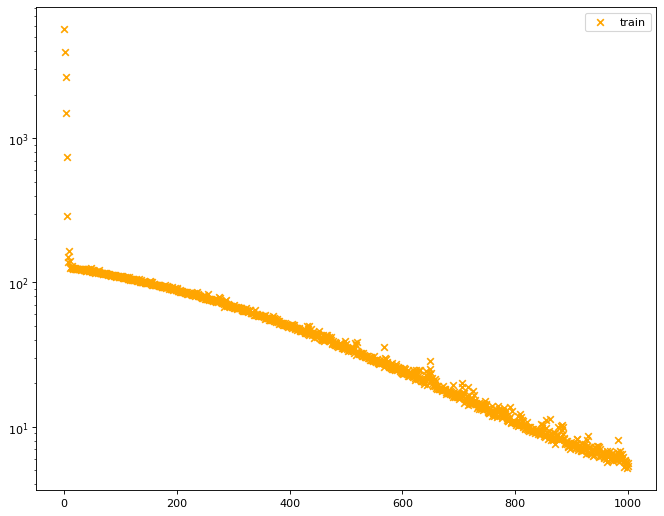

In [8]:
nn2.plot_loss()

In [9]:
# conv1d

In [10]:
X = np.arange(100).reshape(25, 1, 4)
y = np.sum(X, axis=2)

In [11]:
nn = network.NeuralNetwork([
                            network.Conv1d_layer(1, 4, 4, 2),
                            network.Activation_layer('ReLU'),
                            network.Conv1d_layer(4, 1, 3, 2),
                            network.Activation_layer('ReLU'),
                            network.Flatten_layer(),
                            network.Linear_layer(2, 1)
                            ])

param = {"lr": 3e-4, 'batch': 8, "mode": "train", "eps": 1e-16, "epoch": 0, 't': 1, 'clip': 1.0,
         'optimizer': ('Adam', 0.9, 0.999), 'regularizer': None, "loss_fn":"mse"}

In [12]:
nn.print_parameters()

--0--
Printing conv1d layer:
{'bias': array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]),
 'db1': array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]),
 'db2': array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]),
 'freeze': False,
 'ic': 1,
 'iw': 4,
 'kernels': array([[[-0.51060242,  0.07764474]],

       [[ 1.07389625,  0.13462166]],

       [[ 1.09753409,  0.38216243]],

       [[-0.36094769, -0.32287468]]]),
 'kw': 2,
 'm1': array([[[0., 0.]],

       [[0., 0.]],

       [[0., 0.]],

       [[0., 0.]]]),
 'm2': array([[[0., 0.]],

       [[0., 0.]],

       [[0., 0.]],

       [[0., 0.]]]),
 'oc': 4,
 'ow': 3,
 'stride': 1,
 'type': 'conv1d'}
--1--
Printing activation layer:
{'freeze': False,
 'func_backward': <function <lambda> at 0x000002060EC969D0>,
 'func_forward': <function <lambda> at 0x000002060EC96940>,
 'func_name': 'relu',
 'type': 'activation'}
--2--
Printing conv1d layer:


In [13]:
for _ in range(1000):
    nn.train(X, y, param)

Average loss = 4874.325458, elapsed time = 0.01.
Average loss = 4707.604075, elapsed time = 0.01.
Average loss = 4597.164569, elapsed time = 0.01.
Average loss = 4494.918420, elapsed time = 0.01.
Average loss = 4285.370566, elapsed time = 0.01.
Average loss = 4184.716678, elapsed time = 0.01.
Average loss = 4050.631371, elapsed time = 0.01.
Average loss = 3913.845236, elapsed time = 0.01.
Average loss = 3760.602495, elapsed time = 0.01.
Average loss = 3617.857949, elapsed time = 0.01.
Average loss = 3513.052061, elapsed time = 0.01.
Average loss = 3369.457229, elapsed time = 0.01.
Average loss = 3273.665455, elapsed time = 0.01.
Average loss = 3146.355712, elapsed time = 0.01.
Average loss = 2958.998258, elapsed time = 0.01.
Average loss = 2889.576821, elapsed time = 0.01.
Average loss = 2790.451042, elapsed time = 0.01.
Average loss = 2649.932056, elapsed time = 0.00.
Average loss = 2586.755359, elapsed time = 0.01.
Average loss = 2440.539889, elapsed time = 0.01.
Average loss = 2337.

In [14]:
nn.print_parameters()

--0--
Printing conv1d layer:
{'bias': array([[ 1.09528321,  0.99408883,  0.961812  ],
       [-0.59342796, -0.5961344 , -0.5961344 ],
       [-0.66861013, -0.72338175, -0.72338175],
       [ 0.        ,  0.        ,  0.        ]]),
 'db1': array([[-0.21317953, -0.21317953, -0.21317953],
       [ 0.77006487,  0.77900299,  0.77900299],
       [ 0.05012992,  0.06759622,  0.06759622],
       [ 0.        ,  0.        ,  0.        ]]),
 'db2': array([[0.0352603 , 0.03525687, 0.03525513],
       [0.6616977 , 0.67091284, 0.67091284],
       [0.00379725, 0.00564821, 0.00564821],
       [0.        , 0.        , 0.        ]]),
 'freeze': False,
 'ic': 1,
 'inputs': array([[[32, 33, 34, 35]],

       [[64, 65, 66, 67]],

       [[80, 81, 82, 83]],

       [[68, 69, 70, 71]],

       [[12, 13, 14, 15]],

       [[60, 61, 62, 63]],

       [[28, 29, 30, 31]],

       [[56, 57, 58, 59]]]),
 'iw': 4,
 'kernels': array([[[-0.18093312,  0.44317951]],

       [[ 1.14905243,  0.19188309]],

       [[ 1.08

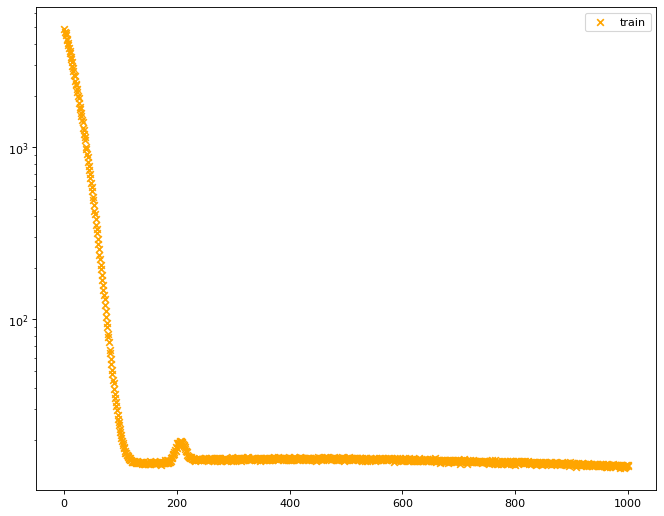

In [15]:
nn.plot_loss()